<h1><center>Auxiliar 3: Introducción a Pytorch 🔥</center></h1>

<center><strong>CC6205: Procesamiento del Lenguaje Natural</strong></center>


## 📚 **Objetivos de la clase** 📚

La clase auxiliar de esta semana tendrá varios objetivos:

- Introducir PyTorch, un Framework para trabajar con Deep Learning
- Definir y explicar el concepto de Tensor.
- Motivar el uso de Mini-Batch.
- Explicar el uso de GPU en Deep Learning.
- Explicar el cálculo de derivadas con PyTorch.
- Construir un modelo de Embedding más una red Feed Forward 😲
- Construir un modelo de Embedding más una CNN 😲

Una vez resuelto, pueden utilizar cualquier parte del código que les parezca prudente para futuras tareas 😊.

# **Parte 1: Introducción**

<!-- Tomar en consideracion que los chicos no han visto nada practico en deep learning. No se les explicaron cosas como optimizers, schedulers, etc asique hay que ser pedagogicos.

* Motivacion, trabajo con tensores, dimensionalidad alta, optimizacion en gpu, utilidad de computo por batch (eficiencia, robustez del modelo, etc)


* introducir la api, las operaciones basicas, operaciones de creacion, operaciones inplace, cambiar la forma de los tensores, etc

* mostrar el uso de la gpu con ejemplos (mostrar nvidia-smi), revisar codigo agnostico al dispositivo -->


------------------------------------------------------
En esta auxiliar vamos a introducir PyTorch, un framework para hacer deep learning, y también mostrar dos aplicaciones. Esta herramienta va a ser usada de aquí hasta el final del curso, así que es importante que tengan un conocimiento base sobre este framework.

## **¿Qué es PyTorch exactamente?**

PyTorch es un framework para hacer Deep Learning. Las características principales que ofrece son:

- Operaciones basicas con **tensores**.
- Usar facilmente y de forma transparente la **GPU**, si es que existe.
- Utilidades ya implementadas para acelerar el desarrollo de **redes neuronales**. Capas lineales, capas recurrentes, capas convolucionales, funciones de activación, funciones de pérdida, etc.
- Motor de **diferenciación y propagación de gradientes automático**. Se guarda un registro de las operaciones que se realizan sobre un tensor y luego se puede calcular automáticamente la derivada de un tensor de salida con respecto a los parámetros que estuvieron involucrados es un cálculo.

<!-- Como les decia, PyTorch es un framework para hacer deep learning. Las caracteristicas principales de un framework de este tipo es que permite trabajar y realizar operaciones basicas con tensores (abajo explicamos que son y por qué nos interesan), permite usar facilmente y de forma transparente la GPU, si es que existe (mas delante explicamos por que querriamos hacer esto)  y tambien viene con varias utilidades ya implementadas para acelerar el desarrollo de redes neuronales. Por ejemplo, viene con varios modulos de redes neuronales, como capas lineales (como las que vieron en clases), capas recurrentes, capas convulocionales (estas se ven mas adelante), funciones de activacion, funciones de perdida, etc. Finalmente, y quiza lo mas importante del framework, es que viene con un motor de diferenciacion y propagacion de gradientes automatico, es decir, se guarda un registro de las operaciones que se realizan sobre un tensor y luego se puede calcular automaticamente la derivada de un tensor de salida con respecto a los parametros que estuvieron involucrados en su calculo.

-->


## **¿Qué es un tensor?**

Un tensor es una estructura matemática para organizar datos. De toda la vida hemos sabido lo que es un **número**. En álgebra lineal vimos que podemos organizar (de forma indexada) varios números en lo que llamamos **vector**, y luego extendimos esta organización a una estructura bidimensional, una **matriz**, con filas y columnas.

Los **tensores** son una forma de generalizar esta idea. Decimos que un numero wacho es un tensor de 0 dimensiones, un **vector** es un tensor de **1 dimensión** y una **matriz** es un tensor de **2 dimensiones**. Este concepto nos permite generalizar esta organización de los datos sobre dimensiones mayores. Podemos hablar, por ejemplo, de un **cubo** (un tensor de 3 dimensiones), que se podría interpretar como varias matrices apiladas, o más generalmente un **tensor de N dimensiones** donde N es un número cualquiera (entre mas grande N mas difícil de imaginar :D).

Los tensores de dimensiones mayores se los pueden imaginar como listas, donde sus elementos son tensores de dimensiones menores. Esto lo pueden ver en la siguiente fotaza:

(source: knoldus)

![visualizacion tensor](https://i.stack.imgur.com/Lv1qU.jpg)

Otro Ejemplo un poco mas burdo:

<br>
<center>
<img src="https://drive.google.com/uc?export=view&id=1tb7popMBUSSj4YzD-Ypytoo6n7PbXzuJ" width=300 height=300 />
</center>
<br>

## **¿Por qué me interesan los tensores?**

Cuando uno trabaja en Deep Learning, es muy común encontrarse con datos de **alta dimensionalidad**.

En **NLP** por ejemplo, en el capitulo de embeddings vimos que es útil representar una **palabra** como un **vector** que captura información de la palabra, ya sea de su contexto, de los caracteres que contiene, etc.

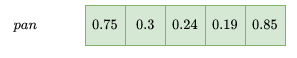

Tomando esto en cuenta, vemos que una lista de palabras (una frase) la podemos representar como una **matriz**. A estas alturas ya tenemos un **tensor de 2 dimensiones**

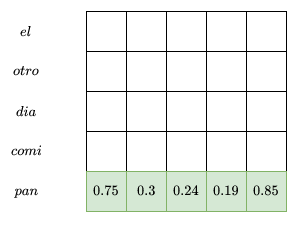

¿Qué pasa si por alguna razón queremos operar sobre varias frases a la vez? ¿Qué pasa si tenemos una lista de frases? Bueno, ahora tenemos un "cubo", un tensor de 3 dimensiones, donde la primera dimensiones corresponde a cada frase dentro del conjunto, la segunda a cada palabra dentro de la frase y finalmente la tercera a cada una las posiciones dentro del vector de embeddings.

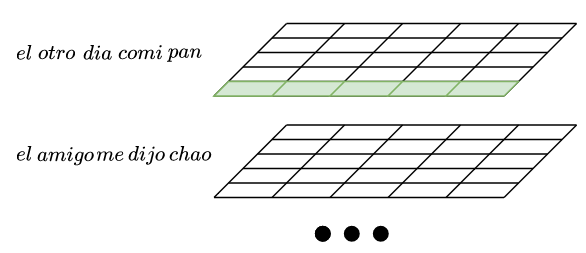

Esto se repite en muchas más áreas, por ejemplo una imagen RGB es un tensor de 3 dimensiones, un video, donde hay una lista de imágenes se puede interpretar como un tensor de 4 dimensiones, y así.

Analizar **varios elementos a la vez** es una práctica común en Deep Learning. Esto hace que el manejo de **tensores** se vuelva importante debido a que normalmente aumentamos en uno el número de dimensiones de los ejemplos al hacer esto.

## **Mini-Batches y entrenamiento**

En clases se vio que la forma en la que se entrenan las redes neuronales es un **proceso iterativo**, donde en primer lugar se realiza una **predicción que es mala**, **se calcula una función de perdida**, **para cada parámetro se calcula el gradiente de la _loss_ con respecto a este parámetro** y luego **se desciende en la dirección de este gradiente para tratar de llevar los parámetros a los valores que minimizan la función de perdida**.

Si este proceso iterativo se llevara a cabo de a un ejemplo a la vez, el valor de **la _loss_ sería muy dependiente del ejemplo concreto que se acaba de observar** y podría no ser representativo de la _loss_ general. Esto resulta en actualizaciones ruidosas de los parámetros, porque la _loss_ para el siguiente ejemplo puede ser muy distinta al valor anterior y así es como los parámetros pueden oscilar y tener dificultad para converger.

Acá es donde nos viene a rescatar el concepto de **_mini-batch_**. Un **Mini-Batch** es un **pequeño subconjunto aleatorio de muestras** de los datos de entrenamiento. Los ejemplos se pasan por la red en **grupos pequeños** para que cada conjunto produzca una  **_loss_ más representativa**. Esto le agrega robustez al modelo y lo **ayuda a converger**. El tamaño del _mini-batch_ (cantidad de ejemplos que se pasan a la vez) se vuelve un hiper parámetro de la red. Los valores óptimos de tamaño de _mini-batch_ pueden variar mucho, pero los números que yo he visto varían entre 8 y 32, aunque para algunas aplicaciones he visto valores del orden de 1000.


Pueden leer un poco más [acá](https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/) o [acá](https://ruder.io/optimizing-gradient-descent/), la sección introductoria lo explica un poco en más detalle, y cita al libro [Deep Learning](https://www.deeplearningbook.org/), que es muy weno :-)

<br>
<center>
<img src="https://ruder.io/content/images/2016/09/contours_evaluation_optimizers.gif" width=300 height=300 />
</center>
<br>



## **Ejemplos**
La API realmente es muy similar a la de Numpy, asique veremos solo unos pocos ejemplos. La documentación sobre los tensores la pueden ver [acá](https://pytorch.org/docs/stable/tensors.html) y la documentacion general de las operaciones sobre tensores que ofrece pytorch esta [acá](https://pytorch.org/docs/stable/torch.html).


In [ ]:
# Instalamos portalocker para luego acceder a los datasets de Pytorch
!pip install portalocker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Nos aseguramos que pytorch y torchtext esten en la ultima version
!pip install torch -U
!pip install torchtext -U
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Creacion de un tensor a partir de otra estructura
a = [[2,3,4], [4,5,6]]
t = torch.tensor(a)
print("Desde una lista de listas\n", t)
print("\nDimensiones del tensor\n", t.size())
print("\nNumero de dimensiones del tensor\n", t.dim())

Desde una lista de listas
 tensor([[2, 3, 4],
        [4, 5, 6]])

Dimensiones del tensor
 torch.Size([2, 3])

Numero de dimensiones del tensor
 2


In [ ]:
# Creacion de un tensor "vacio"
t = torch.empty(2,2,3)
print("Tensor vacio\n", t)

Tensor vacio
 tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])


In [ ]:
# Creacion de tensores con puros 1 o puros ceros
t = torch.ones(2,3,4)
# t = torch.zeros(2,3,4,5)
print("Puros unos\n", t) # notar la tercera dimension

Puros unos
 tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


In [ ]:
# Random sampling
t = torch.empty(3, 2).uniform_() # notar operacion in-place
print("Distribucion uniforme\n", t)

t = torch.randn(2, 3)
print("\nDistribucion normal\n", t)

Distribucion uniforme
 tensor([[0.3622, 0.7138],
        [0.0177, 0.9653],
        [0.7910, 0.9969]])

Distribucion normal
 tensor([[-1.8151,  0.0762, -1.1272],
        [ 1.5216,  0.9126, -0.3856]])


In [ ]:
# Operaciones matematicas
t = torch.ones(3,4)
print("Operaciones con escalares\n", t + 5)

Operaciones con escalares
 tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]])


In [ ]:
# Operaciones entre tensores
t1 = torch.ones(2, 3)
t1

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
t2 = torch.ones(2, 3) * 2
print("Operaciones entre tensores\n", t1 + t2)

Operaciones entre tensores
 tensor([[3., 3., 3.],
        [3., 3., 3.]])


In [ ]:
# Tambien se pueden hacer operaciones in-place, se modifica el mismo tensor
t = torch.ones(2,3)
t.add_(1)
print("Suma in-place\n", t)

Suma in-place
 tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [ ]:
# Hay veces que es util reorganizar los datos de un tensor, o agregar
# dimensiones
t = torch.arange(16)
print("Dimensiones de partida\n", t.shape)

t = t.view(-1, 8)
print("\nUsamos el metodo .view() y el -1 para que torch infiera dimensiones\n", t.shape)

t = t.flatten() # Aqui tambien se podria usar .view(-1)
print("\nPodemos volver a aplanar el tensor con .flatten()\n", t.shape)

t = t.view(-1, 4).unsqueeze(1) # tambien podria ser .view(-1, 1, 4)
print("\nPodemos agregar dimensiones sin agregar datos con .unsqueeze()\n", t.shape)

t = t.squeeze()
print("\nCon .squeeze() podemos sacar todas las dimensiones de tamaño 1\n", t.shape)

Dimensiones de partida
 torch.Size([16])

Usamos el metodo .view() y el -1 para que torch infiera dimensiones
 torch.Size([2, 8])

Podemos volver a aplanar el tensor con .flatten()
 torch.Size([16])

Podemos agregar dimensiones sin agregar datos con .unsqueeze()
 torch.Size([4, 1, 4])

Con .squeeze() podemos sacar todas las dimensiones de tamaño 1
 torch.Size([4, 4])


In [ ]:
# Podemos hacer las tipicas sumas
t = torch.randn(5, 10)
# dim = 0 es suma de filas y 1 de columnas
print(f"dim=0: {t.sum(dim=0)}")
print(f"dim=1: {t.sum(dim=1)}")

dim=0: tensor([-2.0317,  3.2109,  3.9659, -2.3611,  2.0870, -0.5390, -1.8922,  0.9365,
         3.0435,  0.1149])
dim=1: tensor([-2.1338,  3.8021, -1.3782,  1.7595,  4.4852])


In [ ]:
# Tal como con numpy podemos hacer funciones
def softmax(T, dim):
  T = torch.as_tensor(T)
  T = T - torch.max(T)
  deno = torch.exp(T)
  suma = torch.sum(torch.exp(T), dim=dim, keepdim=True)
  output = deno/suma
  return output

In [ ]:
t = torch.randn(5, 32)
softmax(t, dim=1)

tensor([[0.0054, 0.0704, 0.0274, 0.0212, 0.0399, 0.0093, 0.0299, 0.0046, 0.0257,
         0.0248, 0.0420, 0.0315, 0.0839, 0.0160, 0.0153, 0.0034, 0.0144, 0.0369,
         0.0971, 0.0120, 0.0083, 0.0699, 0.0094, 0.0057, 0.0087, 0.0049, 0.0234,
         0.0255, 0.2015, 0.0134, 0.0142, 0.0042],
        [0.0179, 0.0024, 0.0129, 0.0122, 0.0180, 0.0012, 0.0079, 0.0133, 0.0211,
         0.0165, 0.0125, 0.0069, 0.0048, 0.0537, 0.0606, 0.0137, 0.0153, 0.0039,
         0.0510, 0.0365, 0.1179, 0.0415, 0.0071, 0.0267, 0.0082, 0.0115, 0.0094,
         0.0126, 0.0048, 0.0270, 0.0010, 0.3496],
        [0.0183, 0.0413, 0.0406, 0.0109, 0.0587, 0.0117, 0.0062, 0.0090, 0.0328,
         0.1288, 0.0484, 0.0246, 0.0158, 0.0086, 0.0339, 0.0211, 0.1779, 0.0149,
         0.0818, 0.0236, 0.0127, 0.0215, 0.0083, 0.0098, 0.0520, 0.0197, 0.0062,
         0.0296, 0.0056, 0.0197, 0.0024, 0.0037],
        [0.0109, 0.0152, 0.0126, 0.0249, 0.0393, 0.0289, 0.0264, 0.0079, 0.0632,
         0.0146, 0.0581, 0.1166, 0.0272,

## **GPUs y Deep Learning**

La **GPU** es lo mismo que la **tarjeta de video** de los computadores. Es un chip que esta diseñado para manipular gran cantidad de matrices de píxeles, aplicarles transformaciones, y enviarlas a la pantalla para que las podamos ver. Lo interesante de las **GPU** es que están pensadas específicamente para paralelizar cálculos debido a su aplicación en **matrices**.

Como referencia un procesador multi-nucleo tiene entre 4 y 16 núcleos actualmente, mientras que una **GPU** puede fácilmente superar los 1000 núcleos (aunque son más simples).

La mayoría de las operaciones tensoriales se pueden paralelizar, por lo que la GPU se aprovecha de esta propiedad y es capaz de realizar operaciones sobre una matriz completa en **un solo ciclo de reloj** (muy muy rápido). Esto puede mejorar el tiempo de computación hasta por un factor de 100 en cierto casos.

Es por esto que las GPUs se usan tanto en deep learning, porque el **deep learning esta basado en operaciones básicas sobre tensores**, pero en cantidades enormes. Nos estamos aprovechando de años de investigación y desarrollo en cómo subir los FPS de tu juego favorito para darle un uso ~~productivo~~ científico.

Si bien las GPU son la principal componente utilizada para realizar deep learning, el 2018 Google hizo publicas unos procesadores llamaods [TPU](https://cloud.google.com/tpu?hl=es-419), quienes permiten realizar una parelización extrema en las operaciones. A pesar de sus beneficios, actualmente estos dispositivos solo se encuentran disponibles en los nubes de Google (de puro tacaños..).

In [ ]:
%%html
<iframe
    width="560"
    height="315"
    src="https://www.youtube.com/embed/-P28LKWTzrI"
    frameborder="0"
    allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture"
    allowfullscreen>
</iframe>


## **Usando la GPU en PyTorch**

Otra de las gracias de **PyTorch** es que permite **interactuar con la GPU** de forma muy transparente para el usuario. Mover **tensores** desde la CPU (que es donde se crean por default) hacia la GPU se hace en una pura línea, y además es muy simple escribir código **agnóstico** al dispositivo, lo que significa que si el sistema donde se corre el código dispone de GPUs estas se ocupan, pero si no, se ocupa la CPU nomás.

A continuación hay unos ejemplos, y pueden leer más al respecto [acá](https://pytorch.org/docs/stable/notes/cuda.html).

In [ ]:
# Primero usemos un comando de shell para obtener informacion de la GPU
# Recuerden cambiar el runtime del colab
!nvidia-smi

Thu May 18 18:19:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Verificar si cuda esta disponible en el entorno
print("Habemus GPU?", torch.cuda.is_available())
if torch.cuda.is_available(): # Usar esto para codigo agnostico
    print("Cuantas GPUs me regala Google?", torch.cuda.device_count())

Habemus GPU? True
Cuantas GPUs me regala Google? 1


In [ ]:
# Mover tensores entre gpu y cpu
t = torch.empty(3, 4)
print(f"Los tensores se instancian en la {t.device} por default")

t = t.cuda() # .cuda() retorna un nuevo tensor en GPU
print(f"Pero se pueden mover al dispositivo {t.device} usando el methodo .cuda()")

t = torch.empty(3, 4).to("cuda") # Tambien se puede usar con "cpu"
print(f"Tambien se pueden llevar a {t.device} usando el metodo .to()")

Los tensores se instancian en la cpu por default
Pero se pueden mover al dispositivo cuda:0 usando el methodo .cuda()
Tambien se pueden llevar a cuda:0 usando el metodo .to()


In [ ]:
# Veamos el uso de la gpu
!nvidia-smi

Thu May 18 18:19:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    26W /  70W |    601MiB / 15360MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Ahora creemos un tensor tremendo
t = torch.empty(6000, 1000, 1000, device="cuda", dtype=torch.int8) # Cada elemento pesa 1 byte

# Y veamos cuanta VRAM estamos usando
!nvidia-smi

Thu May 18 18:19:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    26W /  70W |   6325MiB / 15360MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Oye pero mi GPU no es tan bacán, no tengo tanta VRAM, me voy a echar el ramo u.u

Pucha, las GPUs son caras, pero por suerte Google se baña en dinero y nos regala tiempo de GPU en Colab.



\begin{equation}
    Google \downarrow
\end{equation}

<center><img src="https://media.giphy.com/media/Xy2PrQq6BIw7u/giphy.gif"></center>



## **Derivar con PyTorch**

<center><img src="https://pytorch.org/assets/images/computational_graph_reverse_auto_differentiation.png" height=300></center>

Otra gracia más de PyTorch (un framework muy agraciado) es que puede **almacenar el grafo de computación** luego de realizar **operaciones sobre tensores**. Además, todas las **funciones** que usa el framework tienen sus respectivas **derivadas implementadas**, lo permite que se pueda calcular la derivada de un **nodo raíz del grafo de computación (tensores de salida)** con respecto una **hoja (tensores de entrada)**. Más información con respecto a autograd se puede revisar [acá](https://pytorch.org/docs/stable/notes/autograd.html).



Veamos un ejemplo super simple (para mantenerlo simple, todas las operaciones son punto a punto). Queremos derivar la siguiente expresión:

$$out = mean(x^2 + log(x))$$

Asumamos que $x$ es un **tensor** de **una sola dimensión**, pero la explicación aplica también para tensores de más dimensiones. Notemos también que $out$ es un escalar.

Podemos definir una variable auxiliar como:
$$u = x^2 + log(x)$$

Con lo cual:
$$out = mean(u)$$

Al derivarlo tenemos:
$$\frac{\partial out}{\partial x_i} = \sum_j\frac{\partial out}{\partial u_j}\frac{\partial u_j}{\partial x_i}$$

Reemplazando tenemos:
$$\frac{\partial out}{\partial x_i} = \sum_j\frac{\partial mean(u)}{\partial u_j}\frac{\partial (x_j^2 + log(x_j))}{\partial x_i}$$


###Primera parte de la derivada
Veamos primero como queda la primera derivada.

\begin{equation}
\frac{\partial mean(u)}{\partial u_j} = \frac{1}{len(u)}\frac{u_1 + \dots + u_j + \dots + u_n}{\partial u_j} = \frac{1}{len(u)}, \forall j
\end{equation}

Si se fijan, el largo de un vector no depende de ningún valor específico, y como el promedio es una suma de los elementos del tensor, la derivada es $\frac{1}{len(y)}$.

###Segunda parte de la derivada
La siguiente derivada es más fácil, ya que son solo operaciones punto a punto. Todas las posiciones que no dependen de la posición _i-esima_ se van a cero. La derivada queda como sigue.
\begin{equation}
\begin{split}
\frac{\partial (x_j^2 + log(x_j))}{\partial x_i} & =
\begin{cases}
2x_i + \frac{1}{x_i} & \text{ if } j = i \\
0 & \text{ if } j \neq i
\end{cases} \\
\sum_j \frac{\partial (x_j^2 + log(x_j))}{\partial x_i} & = 2x_i + \frac{1}{x_i}
\end{split}
\end{equation}

Con estas dos derivadas calculadas podemos volver a la ecuación incial y calcular el valor total de la derivada original. Queda de la siguiente forma (más un poco de algebra para que la ecuación quede bonita).

\begin{equation}
\frac{\partial out}{\partial x_i} = \frac{2x_i^2 + 1}{x_ilen(x)}
\end{equation}

Si probamos con el vector $x=[1,2,3,4]$, reemplazando en la formula deberíamos obtener que el gradiente con respecto a $x$ es $[\frac{3}{4},\frac{9}{8},\frac{19}{12},\frac{33}{16}] = [0.75, 1.125, 1.5833, 2.0625]$

Ahora veamos como pytorch lo hace todo automáticamente. ~~Para no hacer esto nunca más~~.

In [ ]:
x = torch.arange(1., 5., requires_grad=True) # Se registra en el grafo de computacion
out = torch.mean(x**2 + torch.log(x))
out.backward() # Se usa backpropagation para calcular gradientes

print("Gradiente de out con respecto a x\n", x.grad)


Gradiente de out con respecto a x
 tensor([0.7500, 1.1250, 1.5833, 2.0625])


In [ ]:
# Otro ejemplo no esta de mas (mas simple)
y = torch.ones(3,5, requires_grad=True)
z = torch.sum(y**2+10)
z.backward()
y.grad

tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])

## **Recomendaciones**

La api de PyTorch es **gigante** así que yo recomiendo que cuando quieran realizar alguna operación sobre un tensor y no pillen fácilmente en la documentación una forma directa de hacerlo, nos pregunten nomás. Preguntas del tipo: "como hago x en pytorch" o "como hago y en pytorch" son perfectamente razonables, no tengan verguenza de preguntar en el foro/discord :D

Hasta acá llega la introducción a [PyTorch](https://pytorch.org/), cualquier duda extra nos pueden preguntar extensivamente en el foro o por Discord .


_Eso es todo amigos_




In [ ]:
%%html
<iframe
    width="560"
    height="315"
    src="https://www.youtube.com/embed/Ga_RwPmx-N0"
    frameborder="0"
    allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture"
    allowfullscreen>
</iframe>

In [ ]:
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Parte 2: Clasificación de Texto usando la librería torchtext (Embeddings + FeedForward)

Ahora usaremos capas de Embedding y en redes feed forward para la clasificación de texto.

## Datos

Descarguémos el dataset que usaremos en los ejmplos de esta parte de la auxiliar

In [ ]:
!wget raw.githubusercontent.com/uchile-nlp/ArgumentMining2017/master/data/complete_data.csv.gz
# !gunzip complete_data.csv.gz

--2023-05-18 18:19:35--  http://raw.githubusercontent.com/uchile-nlp/ArgumentMining2017/master/data/complete_data.csv.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/uchile-nlp/ArgumentMining2017/master/data/complete_data.csv.gz [following]
--2023-05-18 18:19:35--  https://raw.githubusercontent.com/uchile-nlp/ArgumentMining2017/master/data/complete_data.csv.gz
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9304385 (8.9M) [application/octet-stream]
Saving to: ‘complete_data.csv.gz’

complete_data.csv.g 100%[===================>]   8.87M  --.-KB/s    in 0.1s    

2023-05-18 18:19:36 (89.1 MB/s) - ‘c

In [ ]:
import gzip
import csv
with gzip.open('complete_data.csv.gz', 'rt') as f:
  data = csv.DictReader(f, strict=True, escapechar="\\")

  # Para este ejemplo solo voy a trabajar con documentos de la categoria 1, "Valores"
  dataset = tuple(
      # Usemos lowercase para que el vocabulario no quede tan grande
      (row["constitutional_concept"], row["argument"].lower())
      for row in data if row["topic"] == "1" and row["argument"]
  )

dataset = dataset[:10000]

# Mostremos algunos ejemplos
from random import sample
for example in sample(dataset, 3):
    print("\nEjemplo aleatorio:\n", example)


Ejemplo aleatorio:
 ('Solidaridad', 'ser generoso con la comunidad y sobre todo con quienes se ven más desprotegidos')

Ejemplo aleatorio:
 ('Democracia', 'el cambio constitucional es un proceso ciudadano que trasladará a las instituciones, los valores, principios, derechos, deberes e instituciones.')

Ejemplo aleatorio:
 ('Democracia', 'nuestra opinión es importante porque nosotros formamos el estado. todos podemos elegir y no solo los que han recibido una educación mejor.')


## Splits

In [ ]:
# Ahora con este vocabulario podemos armar un set de train y uno de validacion
import torch
from torch.utils.data.dataset import random_split
train_len = int(len(dataset) * .8)

train_split, validation_split = random_split(dataset, [train_len, len(dataset) - train_len])

print("Algunos ejemplos del dataset:")
for example in sample(list(train_split), 3):
    print(example)

Algunos ejemplos del dataset:
('Respeto', 'es un valor fundamental el respeto, como signo vivo de la aceptación incondicional de unos con otros, a pesar de nuestras diferencias políticas, religiosas, sociales, etc')
('Respeto', 'debido a que el concepto engloba valores y principios desglosados anteriormente.')
('Descentralización', 'la práctica de los poderes centralizados no ha logrado superar las barreras geográficas que permitan tomar buenas y atingentes decisiones a la realidad de cada región.')


## Vocabulario (a partir del train split)

Ahora construiremos el vocabulario, para esto necesitamos un tokenizador, pero ``torchtext`` no tiene un tokenizador para español así que bajaremos uno de ``spacy``

In [ ]:
!python -m spacy download es

2023-05-18 18:19:40.748938: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 18:19:41.781464: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-18 18:19:43.059097: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-18 18:19:43.059561: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
# Ahora si construiremos el vocabulario y la lista de labels
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer("spacy", "es")
min_freq = 1
vocab = build_vocab_from_iterator((tokenizer(text[1]) for text in train_split), min_freq=min_freq)
labels = list({doc[0] for doc in train_split})
label_map = {label: index for index, label in enumerate(labels)}

UNK_IDX = 0
vocab.set_default_index(UNK_IDX)

vocab.insert_token('<pad>', 1)

stoi = vocab.get_stoi()

print("\Tamaño del vocabulario:", len(vocab))
print("Algunas palabras del vocabulario:", sample(vocab.get_itos(), 5))
print("\nCantidad de labels:", len(labels))
print("Algunos labels:", sample(labels, 3))

/usr/local/lib/python3.10/dist-packages/torchtext/data/utils.py:105: UserWarning: Spacy model "es" could not be loaded, trying "es_core_news_sm" instead
  warnings.warn(


\Tamaño del vocabulario: 9493
Algunas palabras del vocabulario: ['hablamos', 'dependa', 'particularidades', 'reprimido', 'cultivar']

Cantidad de labels: 54
Algunos labels: ['Ciudadanía', 'Pluralismo', 'Respeto']


In [ ]:
label_map

{'Identidad cultural': 0,
 'Paz / Convivencia pacífica': 1,
 'Equidad de género': 2,
 'Familia': 3,
 'Familia basada en matrimonio heterosexual': 4,
 'Solidaridad': 5,
 'Respeto': 6,
 'Participación': 7,
 'Respeto / Conservación de la naturaleza o medio ambiente': 8,
 'Democracia participativa': 9,
 'Tolerancia': 10,
 'Desarrollo': 11,
 'Seguridad': 12,
 'Ciudadanía': 13,
 'República': 14,
 'Estado laico': 15,
 'Propiedad Privada': 16,
 'Integración': 17,
 'Estado de Derecho': 18,
 'Amistad cívica': 19,
 'Unidad': 20,
 'Soberanía': 21,
 'Libertad de culto': 22,
 'Libertad de expresión': 23,
 'Bien Común / Comunidad': 24,
 'Patriotismo': 25,
 'Pluralismo': 26,
 'Emprendimiento libre': 27,
 'Descentralización': 28,
 'Inclasificable/No corresponde': 29,
 'Justicia': 30,
 'Desarrollo integral': 31,
 'Libertad': 32,
 'Estado garante': 33,
 'Equidad': 34,
 'Otro': 35,
 'Seguridad Social': 36,
 'Dignidad': 37,
 'Libertad de conciencia': 38,
 'Inclusión': 39,
 'Justicia social': 40,
 'Autonomí

## Modelo con capa de Embedding

In [ ]:
# Pum ahora hagamos la arquitectura
# simplecita, un capa de embedding, y luego una red feed forward de
import torch.nn as nn
import torch.nn.functional as F

# Red neuronal con una sola capa oculta
class ArgumentClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class, hidden_size, pad_idx):
        super().__init__()

        # capa de embedding
        self.embedding = nn.Embedding(vocab_size, embed_dim, pad_idx)
        # self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, mode="mean")

        # capas de la MLP
        self.fc = nn.Linear(embed_dim, num_class)
        # self.fc1 = nn.Linear(embed_dim, hidden_size)
        # self.fc2 = nn.Linear(hidden_size, num_class)

    def forward(self, batch):
        # La representacion de un documento sera el promedio de los
        # embeddings de sus palabras.
        # (B, N, 1) -> (B, N, E)
        h = self.embedding(batch)
        # (B, N, E) -> (B, E)
        h = h.mean(dim=1)
        # h = self.embedding(batch)

        # computar las capas de la red MLP
        h = self.fc(h)
        # h = F.relu(self.fc1(h))
        # h = self.fc2(h)

        return h
        # return torch.softmax(h, -1)

## Entrenamiento

Primero, necesitamos definir una función que convierta un conjunto de items de nuestro dataset en un batch,recordando que los tensores en pytorch tienen que ser homogeneos. Esta función recibe una lista de muestras del dataset y debe retornar tensores que agrupan estas muestras.

Por ejemplo, si cada ejemplo de nuestro dataset contiene 2 elementos y nuestro tamaño de batch es de 16, entonces esta función debe retorna una tupla de 2 tensores, cada uno de dimension 16 x ...

In [ ]:
#from itertools import zip_longest

# creamos lista de tensores
#train_dataset, validation_dataset = [
#    [
#        (
#            label_map[item[0]],
#            torch.tensor([vocab[token] if token in vocab else 0 for token in tokenizer(item[1])]),
#        ) for item in split
#    ] for split in [train_split, validation_split]
#]




In [ ]:
from itertools import zip_longest

# creamos lista de tensores
train_dataset, validation_dataset = [
    [
        (
            label_map[item[0]],
            torch.tensor([vocab[token] for token in tokenizer(item[1])]),
        ) for item in split
    ] for split in [train_split, validation_split]
]




¿Pero que estamos haciendo en la lista de comprehesion anterior?... Bueno, basicamente estamos entregando los vectores de una forma legible por el computador, de tal forma que el modelo entienda en el entrenamiento una forma numerica de las palabras.

In [ ]:
# Lo que ve el comput
for data in sample(train_dataset, 2):
  print(data)

(42, tensor([   7,  156,  213,    0,    4,   58,  147,  884,    4,  194,    5,    7,
          45,   21,  110,    9,  244,    5, 1019,    9,   38,  553,    3]))
(7, tensor([   6,  100,   72,  411,    2,   14,  487,    6,    4,   39,  245,    9,
         237,    0, 6377, 1915,   11,  717,   63,   21,   36,    3]))


In [ ]:
# Lo que vería un humano
for key in label_map:
  if label_map[key] == data[0]:
    print(f"label: {key}")

human_text = ''
for i in data[1]:
  human_text += vocab.get_itos()[i] + ' '
print(f"text: {human_text}")

label: Participación
text: que esta sea vinculante , es decir que la constitución garantice a través de ejercicios participativos las grandes decisiones del país . 


In [ ]:
def generate_batch(batch):
    return (
        # En este caso como los labels son números,
        # el tensor es de una sola dimension de tamaño batch_size
        torch.tensor([item[0] for item in batch]),

        # En este caso se retorna un tensor de 2 dimensiones, batch_size x N,
        # donde N es mayor largo de los ejemplo en el batch. Aca se realiza
        # padding de los ejemplos mas cortos.
        torch.tensor(
            list(
                zip(
                    *zip_longest(
                        *[item[1] for item in batch], fillvalue=vocab["<pad>"]
                    )
                )
            )
        ),
    )

In [ ]:
# Ahora creamos funciones para entrenar y validar el modelo
from torch.utils.data import DataLoader


def train_func(train_dataset):

    # Entranamos el modelo
    train_loss = 0
    train_acc = 0
    data = DataLoader(
        train_dataset,
        batch_size=BATCH_SIZE,
        shuffle=True,
        collate_fn=generate_batch,
    )
    for i, (cls, text) in enumerate(data):
        optimizer.zero_grad()
        cls, text = cls.to(device), text.to(device)
        output = model(text)

        loss = criterion(output, cls)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        train_acc += (output.argmax(1) == cls).sum().item()

    # Ajustar el learning rate
    # scheduler.step()

    return train_loss / len(train_dataset), train_acc / len(train_dataset)


def test(test_dataset):
    test_loss = 0
    acc = 0
    data = DataLoader(
        test_dataset, batch_size=BATCH_SIZE, collate_fn=generate_batch
    )
    for cls, text in data:
        cls, text = cls.to(device), text.to(device)
        with torch.no_grad():
            output = model(text)
            loss = criterion(output, cls)
            test_loss += loss.item()
            acc += (output.argmax(1) == cls).sum().item()

    return test_loss / len(test_dataset), acc / len(test_dataset)

In [ ]:
# Ahora por fin tenemos todo lo necesario para entrenar el modelo.
import time

N_EPOCHS = 20
LEARN_RATE = 2.0
STEP_SIZE = 1
BATCH_SIZE = 16
EMBED_DIM = 100
HIDDEN_SIZE = 1024

device = "cuda" if torch.cuda.is_available() else "cpu"

model = ArgumentClassifier(
    vocab_size=len(vocab),
    embed_dim=EMBED_DIM,
    num_class=len(labels),
    hidden_size=HIDDEN_SIZE,
    pad_idx=vocab["<pad>"],
).to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARN_RATE)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, STEP_SIZE)


for epoch in range(N_EPOCHS):

    start_time = time.time()
    train_loss, train_acc = train_func(train_dataset)
    valid_loss, valid_acc = test(validation_dataset)

    secs = int(time.time() - start_time)
    mins = secs // 60
    secs = secs % 60

    print(
        f"Epoch: {epoch + 1}", f" | time in {mins} minutes, {secs} seconds",
    )
    print(
        f"\tLoss: {train_loss:.4f}(train)\t|"
        f"\tAcc: {train_acc * 100:.1f}%(train)"
    )
    print(
        f"\tLoss: {valid_loss:.4f}(valid)\t|"
        f"\tAcc: {valid_acc * 100:.1f}%(valid)"
    )

Epoch: 1  | time in 0 minutes, 4 seconds
	Loss: 0.1966(train)	|	Acc: 21.9%(train)
	Loss: 0.1771(valid)	|	Acc: 31.6%(valid)
Epoch: 2  | time in 0 minutes, 1 seconds
	Loss: 0.1669(train)	|	Acc: 34.6%(train)
	Loss: 0.1611(valid)	|	Acc: 35.9%(valid)
Epoch: 3  | time in 0 minutes, 2 seconds
	Loss: 0.1501(train)	|	Acc: 40.7%(train)
	Loss: 0.1499(valid)	|	Acc: 41.0%(valid)
Epoch: 4  | time in 0 minutes, 2 seconds
	Loss: 0.1379(train)	|	Acc: 45.1%(train)
	Loss: 0.1431(valid)	|	Acc: 44.5%(valid)
Epoch: 5  | time in 0 minutes, 1 seconds
	Loss: 0.1281(train)	|	Acc: 47.9%(train)
	Loss: 0.1380(valid)	|	Acc: 45.5%(valid)
Epoch: 6  | time in 0 minutes, 1 seconds
	Loss: 0.1212(train)	|	Acc: 51.6%(train)
	Loss: 0.1345(valid)	|	Acc: 47.1%(valid)
Epoch: 7  | time in 0 minutes, 1 seconds
	Loss: 0.1141(train)	|	Acc: 53.5%(train)
	Loss: 0.1331(valid)	|	Acc: 47.1%(valid)
Epoch: 8  | time in 0 minutes, 1 seconds
	Loss: 0.1085(train)	|	Acc: 55.6%(train)
	Loss: 0.1314(valid)	|	Acc: 47.8%(valid)
Epoch: 9  | time

# Parte 3: Clasificación de texto usando CNN

Para este caso vamos a trabajar con un dataset de noticias, el cual es fácilmente descargable con la librería y da muchos mejores resultados (ya que los anteriores estaban ahí nomas).

In [ ]:
# por si las moscas importamos todo denuevo (para los que recién se unen a la sintonia)
# https://pytorch.org/text/stable/datasets.html#ag-news
import os
import torch
from random import choice
from torchtext.datasets import AG_NEWS
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

os.makedirs("data", exist_ok=True)
train_dataset, test_dataset = AG_NEWS(root="data", split=('train', 'test'))
train_list = list(train_dataset)
test_list = list(test_dataset)

# Informacion relevante del dataset
tokenizer = get_tokenizer("basic_english")
vocab = build_vocab_from_iterator(tokenizer(x[1]) for x in train_list)

vocab.set_default_index(0)
vocab.insert_token('<pad>', 1)

stoi = vocab.get_stoi()

num_classes = 4



Luego, creamos una red no tan profunda pero bien competente para nuestra tarea:

In [ ]:
import torch
import torch.nn as nn
from itertools import zip_longest
import torch.nn.functional as F

class CNNClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim=32, num_classes=10,
                 cnn_pool_channels=24, cnn_kernel_size=3):

        # Inicializamos la clase padre
        super().__init__()

        # Creamos la capa de embedding
        self.embedding = nn.Embedding(vocab_size, embed_dim)

        # Creamos la capa de convolución
        # `in_channels`: Es el número de canales de entrada de la convolución. En este caso, como estamos trabajando con texto, sólo tenemos un canal, por lo que `in_channels=1`.
        # `out_channels`: Es el número de canales de salida de la convolución. Especifica la cantidad de filtros que se aplicarán a la entrada. En este caso, queremos generar `cnn_pool_channels` canales de salida, por lo que `out_channels=cnn_pool_channels`.
        # `kernel_size`: Es el tamaño del kernel de la convolución. En este caso, estamos usando un kernel de tamaño `cnn_kernel_size * embed_dim`, donde `embed_dim` es la dimensión de los vectores de embedding. Esto significa que cada filtro de la convolución cubrirá `cnn_kernel_size` palabras (o tokens) en una dimensión y `embed_dim` en la otra.
        # `stride`: Es el desplazamiento que se aplica a la entrada de la convolución. En este caso, estamos desplazando la entrada `embed_dim` unidades en cada paso. Esto significa que se aplicarán filtros a cada palabra (o token) de la entrada.
        self.conv = nn.Conv1d(
            in_channels=1,
            out_channels=cnn_pool_channels,
            kernel_size=cnn_kernel_size * embed_dim,
            stride=embed_dim,
        )

        # Calculamos el tamaño de entrada de la capa lineal
        fc_in_size = cnn_pool_channels

        # Creamos la capa lineal
        self.fc = nn.Linear(fc_in_size, num_classes)

        # Inicializamos los pesos de las capas
        self.init_weights()

    def init_weights(self):
        # Definimos el rango de los valores iniciales de los pesos
        initrange = 0.5

        # Inicializamos los pesos de la capa de embedding
        self.embedding.weight.data.uniform_(-initrange, initrange)

        # Inicializamos los pesos de la capa lineal
        self.fc.weight.data.uniform_(-initrange, initrange)

        # Inicializamos los sesgos de la capa lineal en cero
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):

        # Preparamos el input de la capa de embeddings a partir de text y offsets
        text = torch.tensor(
            list(
                zip(
                    *zip_longest(
                        *([text[o:offsets[i+1]] for i, o in enumerate(offsets[:-1])] + [text[offsets[-1]:len(texts)]]),
                        fillvalue=vocab["<pad>"]
                    )
                )
            )
        ).to(text.device)

        # Obtenemos la representación de la frase a partir de la capa de embedding
        h = self.embedding(text)

        # Aplicamos la capa de convolución
        h = h.view(h.size(0), 1, -1)
        h = torch.relu(self.conv(h))
        h = h.mean(dim=2)

        # Obtenemos el resultado final a partir de la capa lineal
        output = self.fc(h)

        # Aplicamos la función de activación log-softmax
        return F.log_softmax(output, dim=1)

Finalmente, generamos la función para cargar por batch y luego entrenamos directamente.

In [ ]:
import sys
from torch.optim import SGD, lr_scheduler
from torch.utils.data import DataLoader
from torch.autograd import Variable

def generate_batch(batch):
  label = torch.tensor([entry[0]-1 for entry in batch])
  texts = [tokenizer(entry[1]) for entry in batch]
  offsets = [0] + [len(text) for text in texts]
  offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
  big_text = torch.cat([torch.tensor([vocab[t] if t in stoi else 0 for t in text]) for text in texts])
  #big_text = torch.cat([torch.tensor([vocab.stoi[t] for t in text]) for text in texts])

  return big_text, offsets, label

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

BATCH_SIZE = 256
NUM_EPOCHS = 20
TEST_BATCH_SIZE = BATCH_SIZE * 5
LR = 1e-1

model = CNNClassifier(len(vocab), num_classes=num_classes).to(device)
optimizer = SGD(model.parameters(), lr=LR)
criterion = nn.CrossEntropyLoss().to(device)
scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=[lambda epoch: .9 ** (epoch // 10)])

split_size = {'train': len(train_list), 'test': len(test_list)}

# train_dataset, test_dataset = AG_NEWS(root="data")
for epoch in range(1, NUM_EPOCHS):
  train_loader = DataLoader(train_list, batch_size=BATCH_SIZE, collate_fn=generate_batch)
  test_loader = DataLoader(test_list, batch_size=TEST_BATCH_SIZE, collate_fn=generate_batch)
  loaders = {'train': train_loader, 'test': test_loader}
  for phase in ['train', 'test']:
    if phase == 'train':
      model.train()
    else:
      model.eval()

    total_acc, total_loss = 0, 0
    for i, (texts, offsets, cls) in enumerate(loaders[phase]):
      texts = texts.to(device)
      offsets = offsets.to(device)
      cls = cls.to(device)

      optimizer.zero_grad()
      with torch.set_grad_enabled(phase == 'train'):
        output = model(texts, offsets)
        loss = criterion(output, cls)
        total_loss += loss.item()
        if phase == 'train':
          loss.backward()
          optimizer.step()

      acc = (output.argmax(1) == cls).sum().item()
      total_acc += acc

      sys.stdout.write('\rEpoch: {0:03d}\t Phase: {1} Iter: {2:03d}/{3:03d}\t iter-Acc: {4:.3f}%\t iter-Loss: {5:.3f}'.format(epoch, phase, i+1, len(loaders[phase]), acc/len(offsets)*100, loss.item()))

    if phase == 'train':
      scheduler.step()
    print('\n {0}\tAvg. Acc: {1:.3f}%\t Avg. Loss: {2:.3f}'.format(phase, total_acc/split_size[phase]*100, total_loss/split_size[phase]))

cuda
Epoch: 001	 Phase: train Iter: 469/469	 iter-Acc: 23.958%	 iter-Loss: 1.377
 train	Avg. Acc: 26.982%	 Avg. Loss: 0.005
Epoch: 001	 Phase: test Iter: 006/006	 iter-Acc: 26.083%	 iter-Loss: 1.383
 test	Avg. Acc: 25.118%	 Avg. Loss: 0.001
Epoch: 002	 Phase: train Iter: 469/469	 iter-Acc: 26.562%	 iter-Loss: 1.369
 train	Avg. Acc: 29.483%	 Avg. Loss: 0.005
Epoch: 002	 Phase: test Iter: 006/006	 iter-Acc: 29.667%	 iter-Loss: 1.380
 test	Avg. Acc: 29.329%	 Avg. Loss: 0.001
Epoch: 003	 Phase: train Iter: 469/469	 iter-Acc: 31.771%	 iter-Loss: 1.357
 train	Avg. Acc: 31.831%	 Avg. Loss: 0.005
Epoch: 003	 Phase: test Iter: 006/006	 iter-Acc: 33.583%	 iter-Loss: 1.375
 test	Avg. Acc: 33.000%	 Avg. Loss: 0.001
Epoch: 004	 Phase: train Iter: 469/469	 iter-Acc: 39.583%	 iter-Loss: 1.339
 train	Avg. Acc: 34.222%	 Avg. Loss: 0.005
Epoch: 004	 Phase: test Iter: 006/006	 iter-Acc: 35.500%	 iter-Loss: 1.367
 test	Avg. Acc: 35.013%	 Avg. Loss: 0.001
Epoch: 005	 Phase: train Iter: 469/469	 iter-Acc: 4

Como podemos ver, con esta segunda perspectiva tenemos un clasificador mas competente en relación con el anterior. La idea es que tengan diferente perspectivas en la construcción.